# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import sklearn

In [3]:
# Import essential libraries
import zipfile
import os

Load the dataset.

In [4]:
# Load and unzip the dataset
zip_file="data.zip"
extraction_path= "data"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
print(f"Successfully unzipped '{zip_file}' to '{extraction_path}'")

Successfully unzipped 'data.zip' to 'data'


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
def load_images(dataset_path):
    
    images = []
    labels = []
    label_names = sorted(os.listdir(dataset_path)) # Get label names from subdirectories
    areas = []
   

    print(f"Loading images from: {dataset_path}")
    print(f"Expected labels (subdirectories): {label_names}")

    for label_name in label_names:
        label_dir = os.path.join(dataset_path, label_name)
        if not os.path.isdir(label_dir):
            continue # Skip if it's not a directory

        print(f"  Processing label: {label_name}")
        for image_filename in os.listdir(label_dir):
            if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(label_dir, image_filename)
                try:
                    with Image.open(image_path) as img:
                        img = img.convert("RGB") # Ensure consistent mode (e.g., for grayscale images)
                        original_width, original_height = img.size
                        areas.append(original_width*original_height)                        
                        images.append(img)
                        labels.append(label_name)
                        
                except Exception as e:
                    print(f"    Warning: Could not load or process {image_path}: {e}")

    return images, labels, label_names,areas


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
from PIL import Image
dataset_root_path="data/data"
class_names = sorted([d for d in os.listdir(dataset_root_path) if os.path.isdir(os.path.join(dataset_root_path, d))])
loaded_images, loaded_labels, unique_labels,img_size = load_images("data/data")

Loading images from: data/data
Expected labels (subdirectories): ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
  Processing label: Cardboard
  Processing label: Food_Waste
  Processing label: Glass
  Processing label: Metal
  Processing label: Other
  Processing label: Paper
  Processing label: Plastic


Perform any operations, if needed, on the images and labels to get them into the desired format.

In [7]:
print(f"Total images loaded: {len(loaded_images)}")
print(f"Total labels loaded: {len(loaded_labels)}")
print(f"Unique labels found: {unique_labels}")

Total images loaded: 7625
Total labels loaded: 7625
Unique labels found: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

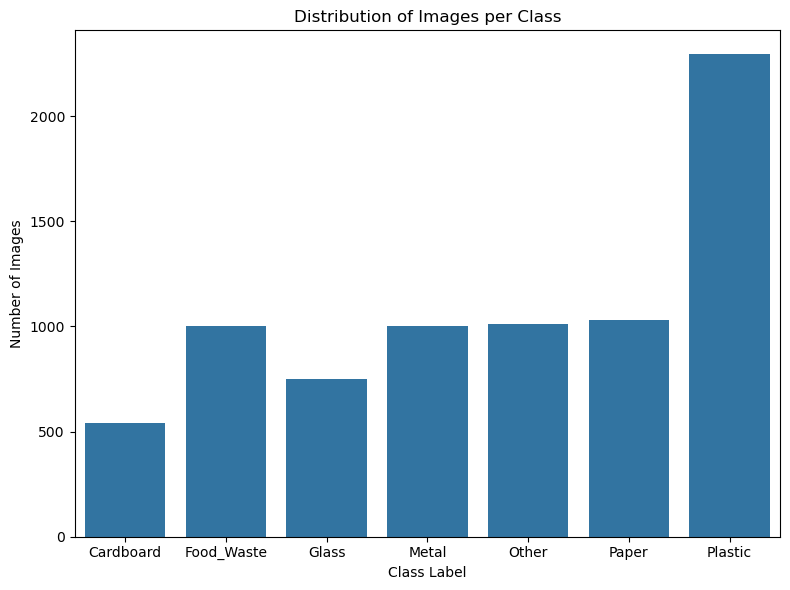

In [8]:
# Visualise Data Distribution
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=loaded_labels,order=unique_labels)
plt.title('Distribution of Images per Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

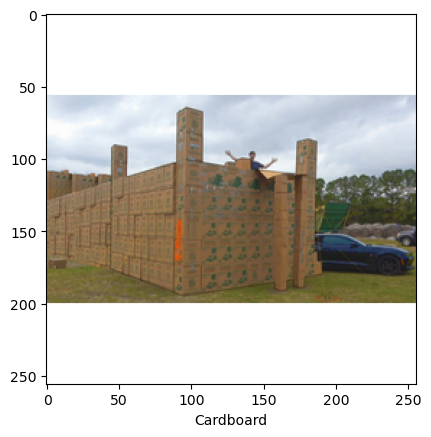

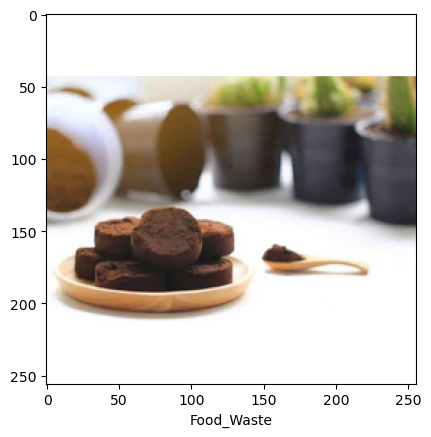

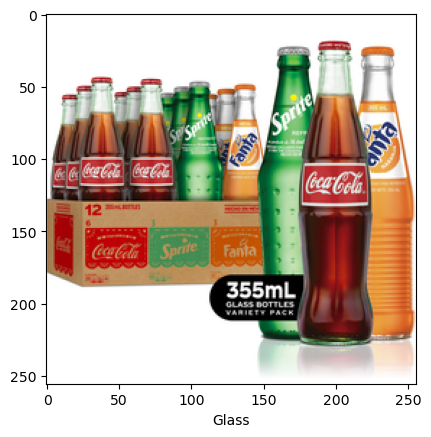

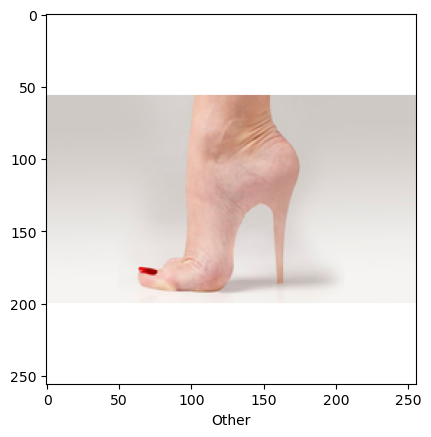

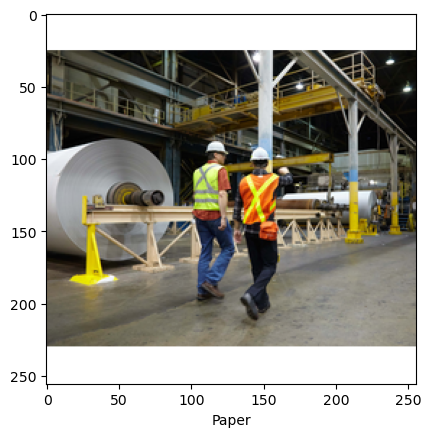

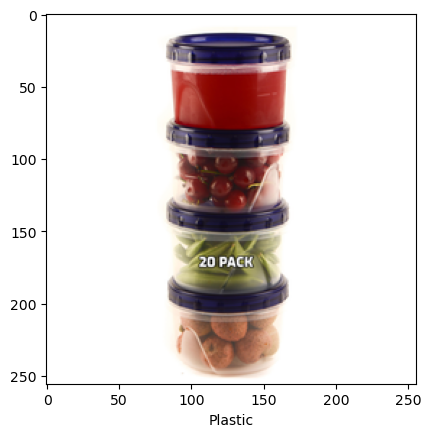

In [9]:
# Visualise Sample Images (across different labels)
file_names = [0,600,1600,3500,5000,7624]
for name in file_names:
  image = cv2.imread(loaded_labels[name])
  plt.imshow(loaded_images[name])  
  plt.xlabel(loaded_labels[name])
  plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set

print(f"Max Image Size: {max(img_size)}")
print(f"Min Image Size: {min(img_size)}")

Max Image Size: 65536
Min Image Size: 65536


In [11]:
dataset_path='data/data'
images = []
labels = []
label_names = sorted(os.listdir(dataset_path)) # Get label names from subdirectories
areas = []
new_width, new_height = 64 , 64  

print(f"Loading images from: {dataset_path}")
print(f"Expected labels (subdirectories): {label_names}")
for label_name in label_names:
        label_dir = os.path.join(dataset_path, label_name)
        if not os.path.isdir(label_dir):
            continue # Skip if it's not a directory

        print(f"  Processing label: {label_name}")
        for image_filename in os.listdir(label_dir):
            if image_filename.lower().endswith(('.png')):
                 image_path = os.path.join(label_dir, image_filename)
                 img = Image.open(image_path)
                 img_resized = img.resize((new_width, new_height), Image.LANCZOS)                 
                 img_resized.save(os.path.join(label_dir, image_filename))
                


Loading images from: data/data
Expected labels (subdirectories): ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
  Processing label: Cardboard
  Processing label: Food_Waste
  Processing label: Glass
  Processing label: Metal
  Processing label: Other
  Processing label: Paper
  Processing label: Plastic


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [12]:
from sklearn.preprocessing import LabelEncoder
def encode_labels(image_dir):
       class_names = sorted(os.listdir(image_dir)) # Get class names from folder names
       label_encoder = LabelEncoder()
       label_encoder.fit(class_names) # Fit encoder with class names
       encoded_labels = label_encoder.transform(class_names) # Transform class names to numerical labels

       class_to_label = dict(zip(class_names, encoded_labels)) # Create a mapping
       return class_to_label

In [13]:
image_directory = "data/data" # Path to your image folder
class_mapping = encode_labels(image_directory)

In [14]:
print(class_mapping)

{'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [15]:
import glob
import shutil

In [16]:
# Where all dataset is there
data_dir = 'data/data'

# Training data dir
training_dir = 'data/Train'

# Test data dir
testing_dir = 'data/Test'

# Ratio of training and testing data
train_test_ratio = 0.7


def split_dataset_into_test_and_train_sets(all_data_dir = data_dir, training_data_dir = training_dir, testing_data_dir=testing_dir, train_test_ratio = 0.7):
    # Recreate testing and training directories
    
    if not os.path.exists(training_data_dir):
            os.mkdir(training_data_dir)
    else:
            shutil.rmtree(training_data_dir)
            os.mkdir(training_data_dir)

    if not os.path.exists(testing_data_dir):
            os.mkdir(testing_data_dir)
    else:
            shutil.rmtree(testing_data_dir)
            os.mkdir(testing_data_dir)
            
    
    num_training_files = 0
    num_testing_files = 0


    for subdir, dirs, files in os.walk(all_data_dir):
        
        category_name = os.path.basename(subdir)
        
        # print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
              continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name
        
        # creating subdir for each sub category
        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)   

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)
            
        file_list = glob.glob(os.path.join(subdir,'*.png'))

        #print(os.path.join(all_data_dir, subdir))
        print(str(category_name) + ' has ' + str(len(files)) + ' images') 
        random_set = np.random.permutation((file_list))
        # copy percentage of data from each category to train and test directory
        train_list = random_set[:round(len(random_set)*(train_test_ratio))] 
        test_list = random_set[-round(len(random_set)*(1-train_test_ratio)):]

  

        for lists in train_list : 
            shutil.copy(lists, training_data_dir + '/' + category_name + '/' )
            num_training_files += 1
  
        for lists in test_list : 
            shutil.copy(lists, testing_data_dir + '/' + category_name + '/' )
            num_testing_files += 1
  

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

In [17]:
# Assign specified parts of the dataset to train and validation sets

split_dataset_into_test_and_train_sets()

Cardboard has 540 images
Food_Waste has 1000 images
Glass has 750 images
Metal has 1000 images
Other has 1010 images
Paper has 1030 images
Plastic has 2295 images
Processed 5337 training files.
Processed 2288 testing files.


In [18]:
img_rows, img_cols = 64 , 64

In [19]:
train_path = 'data/Train' # Path to your training data root
test_path = 'data/Test'   # Path to your testing data root

In [20]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        x_train.append(img_arr)

In [21]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        x_test.append(img_arr)


In [22]:
train_x=np.array(x_train)
test_x=np.array(x_test)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_rows, img_cols),
                                                 batch_size = 50,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (img_rows, img_cols),
                                            batch_size = 50,
                                            class_mode = 'sparse')

Found 5337 images belonging to 7 classes.
Found 2288 images belonging to 7 classes.


In [26]:
train_y=training_set.classes
test_y=test_set.classes

In [27]:
print(train_x.shape)
print(train_y.shape)

(5337, 64, 64, 3)
(5337,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [28]:
img_rows, img_cols = 64 , 64

In [29]:
train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 3)
test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 3)
print(train_x.shape)
print(test_x.shape)

(5337, 64, 64, 3)
(2288, 64, 64, 3)


In [30]:
batch_size = 50
num_classes = 7
epochs = 12
channels=3

In [31]:
# convert class labels (from digits) to one-hot encoded vectors
train_y= tf.keras.utils.to_categorical(train_y, num_classes)
test_y = tf.keras.utils.to_categorical(test_y, num_classes)
print(train_y.shape)

(5337, 7)


In [32]:
train_x.dtype

dtype('uint8')

In [33]:
# convert int to float
train_x = train_x.astype(dtype='float32')
test_x = test_x.astype(dtype='float32')

# normalise
train_x /= 255
test_x /= 255

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [35]:
model = Sequential()
input_shape = (img_rows, img_cols, 3)


# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) # input shape = (img_rows, img_cols, 3)
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))

BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third conv layer
model.add(Conv2D(128, kernel_size=(3, 3), 
                 activation='relu'))

BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()


C:\Users\Rituparna\Desktop\Ritu\Upgrad\Python-01-12-2024\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,103 (2.61 MB)

 Trainable params: 684,103 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [36]:
# Training

# usual cross entropy loss
# choose any optimiser such as adam, rmsprop etc
# metric is accuracy
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
test_x.shape

(2288, 64, 64, 3)

In [38]:
# fit the model
# this should take around 10-15 minutes when run locally on a windows/mac PC 
history=model.fit(train_x, train_y,
          batch_size=50,
          epochs=epochs,
          verbose=1,
          validation_data=(test_x, test_y))

Epoch 1/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.2837 - loss: 1.8478 - val_accuracy: 0.3545 - val_loss: 1.6817
Epoch 2/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.3343 - loss: 1.7216 - val_accuracy: 0.3562 - val_loss: 1.6861
Epoch 3/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.3606 - loss: 1.6576 - val_accuracy: 0.3833 - val_loss: 1.5748
Epoch 4/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - accuracy: 0.4029 - loss: 1.5630 - val_accuracy: 0.4200 - val_loss: 1.5214
Epoch 5/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.4110 - loss: 1.5080 - val_accuracy: 0.4471 - val_loss: 1.4859
Epoch 6/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.4297 - loss: 1.4814 - val_accuracy: 0.4489 - val_loss: 1.4262
Epoch 7/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.4716 - loss: 1.3974 - val_accuracy: 0.4690 - val_loss: 1.4014
Epoch 8/12
107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.4695 - loss: 1

In [39]:
train_accuracy = history.history['accuracy']
train_accuracy

[0.3149709701538086,
 0.3415776789188385,
 0.37418025732040405,
 0.4005995988845825,
 0.4198988080024719,
 0.43395164608955383,
 0.4599962532520294,
 0.4772343933582306,
 0.5010305643081665,
 0.514896035194397,
 0.532508909702301,
 0.5643619894981384]

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [40]:
# Evaluate on the test set; display suitable metrics

# evaluate the model on test data
loss, accuracy=model.evaluate(test_x, test_y)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5138 - loss: 1.4728


In [41]:
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.keras")

Test: accuracy = 0.546329  ;  loss = 1.270642


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [42]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [43]:
# Define augmentation steps to augment images
train_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [44]:
image_size = 64
batch_size = 50

train_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = train_data_gen.flow_from_directory(training_dir, (image_size,image_size), batch_size=batch_size, class_mode='categorical')
valid_generator = valid_data_gen.flow_from_directory(testing_dir, (image_size,image_size), batch_size=batch_size, class_mode='categorical')

Found 5337 images belonging to 7 classes.
Found 2288 images belonging to 7 classes.


In [45]:
# Create a function to augment the images
num_classes = 7

def get_model():
    # Get base model 
    # Here we are using ResNet50 as base model
    base_model = ResNet50(weights='imagenet', include_top=False)
    
    # As we are using ResNet model only for feature extraction and not adjusting the weights
    # we freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
        
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Adding our own layer 
    x = GlobalAveragePooling2D()(base_model_ouput)
    # Adding fully connected layer
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax', name='fcnew')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model



In [46]:
model = get_model()
# Compile it
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Summary of model
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, None, None, 3)     │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 64)    │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, None, None, 64)    │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, None, None, 64)    │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, None, None, 64)    │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, None, None, 64)    │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, None, None, 64)    │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, None, None, 64)    │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, None, None, 256)   │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, None, None, 256)   │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,640,391 (94.00 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

##### **4.1.2**

Train the model on the new augmented dataset.

In [50]:
# Train the model using augmented images
# Training the fully conncected layer for initial epochs
epochs = 5

# Training the model

history1=model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.n//batch_size,
    epochs=epochs,
    verbose=1)


Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7394 - loss: 0.7260 - val_accuracy: 0.6982 - val_loss: 0.9115
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 35s 322ms/step - accuracy: 0.6800 - loss: 0.8332 - val_accuracy: 0.6889 - val_loss: 0.9286
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7409 - loss: 0.7230 - val_accuracy: 0.7013 - val_loss: 0.9073
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 361ms/step - accuracy: 0.7600 - loss: 0.6607 - val_accuracy: 0.7031 - val_loss: 0.8991
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7759 - loss: 0.6379 - val_accuracy: 0.7027 - val_loss: 0.9166


In [51]:
train_accuracy = history1.history['accuracy']
train_accuracy

[0.7312275171279907,
 0.6800000071525574,
 0.7488178610801697,
 0.7599999904632568,
 0.7732173204421997]

In [52]:
loss, accuracy=model.evaluate(valid_generator)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 785ms/step - accuracy: 0.7012 - loss: 0.9231
Test: accuracy = 0.703234  ;  loss = 0.916272


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data

  - We received the image files in zip format
  - The file was containing images for 7 different categories (Cardboard,Food_Waste,Glass,Metal,Other,Paper,Plastic)
  - We resized the images for faster procssing
  - Spilt the data in two part - train(70%) and test(30%)
  - We applied CNN,BatchNormalization,MaxPooling to create the first model.
  - For the second model we applied data augmentation
  
   
* Report model training results
    - We have chosen a bacth_size of 50 and epoch=12. In each iteration on an average accuracy was increasing and loss was decreasing.
   -  There is not much difference between accuracy of train and test set for the first model. Train model accuracy was 56.43 and test model accuracy was 54.63% . So we can say the model is not overfitting.
   - After applying data augmentation properly train and test set accuracy increases. Train set accuracy becomes 77.59 and test accuracy beomes 70.32. Although model tends to overfit in this case.
   - We applied CNN,BatchNormalization,MaxPooling to create the first model.For activaton we have applied softmax.
   - For the second model we applied data augmentation with freezing technique.